## Fake News Detection

### Introduction

Fake news has become one of the most serious problems of our generation. It has a huge impact on our online and offline conversations. Fake news still poses a clear and timely threat to western democracy and social stability. Social media is a huge pool of content and is the most watched part of all the content available to users. Politicians, television stations, newspaper websites, and even the public can post this information. The credibility of these posts is a serious problem in today's world, as many companies are taking steps to educate the public about the dangers of spreading false information. Need to be verified. Manual classification of messages is tedious, time consuming, and biased, so it is not possible to clearly determine the level of reliability of messages posted online.

### Steps for Project Implementation
- Data Preparation and Mining
- Exploratory Data Analysis
- Feature Engineering
- Modelling and Prediction 
- Result

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
news_data = pd.read_csv('C:/Users/Praveen/Desktop/4th Sem/MachineLearning/Project/news_articles.csv')

In [3]:
#get a peek into the data
news_data.tail(15)

author                      published  \
2081  -NO AUTHOR-  2016-10-27T06:30:35.864+03:00   
2082  -NO AUTHOR-  2016-10-27T06:32:38.028+03:00   
2083  -NO AUTHOR-  2016-10-27T07:20:12.250+03:00   
2084  -NO AUTHOR-  2016-10-27T07:20:12.436+03:00   
2085  -NO AUTHOR-  2016-10-27T08:14:27.425+03:00   
2086  -NO AUTHOR-  2016-10-27T08:20:38.377+03:00   
2087  -NO AUTHOR-  2016-10-27T15:10:52.832+03:00   
2088  -NO AUTHOR-  2016-10-27T15:24:15.986+03:00   
2089  -NO AUTHOR-  2016-10-27T15:24:17.638+03:00   
2090  -NO AUTHOR-  2016-10-27T15:36:09.934+03:00   
2091  -NO AUTHOR-  2016-10-27T15:36:10.573+03:00   
2092  -NO AUTHOR-  2016-10-27T15:36:10.671+03:00   
2093  -NO AUTHOR-  2016-10-27T13:30:00.000+03:00   
2094  -NO AUTHOR-  2016-10-27T15:58:41.935+03:00   
2095  Eddy Lavine  2016-10-28T01:02:00.000+03:00   

                                                  title text language  \
2081         dems sue gop over trumps rigged complaints  NaN  english   
2082          yearold hebrew mention of jerusalem found  NaN  english   
2083       boycott targets trump family on retail front  NaN  english   
2084     obamacare tax penalty ill take it millions say  NaN  english   
2085         dems sue gop over trumps rigged complaints  NaN  english   
2086   hillary emails whitelisted for obamas blackberry  NaN  english   
2087      support for assaultweapon ban hits record low  NaN  english   
2088     pope god promised the land to people of israel  NaN  english   
2089  christs burial place exposed for st time in ce...  NaN  english   
2090       prof canoes reek of genocide white privilege  NaN  english   
2091          teens walk free after gangrape conviction  NaN  english   
2092         school named for munichmassacre mastermind  NaN  english   
2093                      russia unveils satan  missile  NaN  english   
2094              check out hillarythemed haunted house  NaN  english   
2095  cannabis aficionados develop thca crystalline ...  NaN      NaN   

     site_url                                       main_img_url  type label  \
2081  wnd.com  http://mobile.wnd.com/files/2016/10/tax_paymen...  bias  Real   
2082  wnd.com  http://mobile.wnd.com/files/2016/07/trump_make...  bias  Real   
2083  wnd.com  http://www.wnd.com/files/2016/10/obama_blackbe...  bias  Real   
2084  wnd.com  http://www.wnd.com/files/2016/10/assault_weapo...  bias  Real   
2085  wnd.com  http://www.wnd.com/files/2016/10/pope_francis_...  bias  Real   
2086  wnd.com  http://www.wnd.com/files/2016/10/jpg_holy_sepu...  bias  Real   
2087  wnd.com         http://www.wnd.com/files/2016/10/canoe.jpg  bias  Real   
2088  wnd.com  http://www.wnd.com/files/2016/10/trial_teens_g...  bias  Real   
2089  wnd.com  http://www.wnd.com/files/2016/10/Salah_Khalaf.jpg  bias  Real   
2090  wnd.com  http://www.wnd.com/files/2016/10/satan2_missil...  bias  Real   
2091  wnd.com  http://www.wnd.com/files/2016/10/hillary_haunt...  bias  Real   
2092  wnd.com  http://www.wnd.com/files/2016/10/rambo_richard...  bias  Real   
2093  wnd.com  http://www.wnd.com/files/2016/10/skype_sex_sca...    bs  Fake   
2094  wnd.com  http://worldtruth.tv/wp-content/uploads/2016/1...    bs  Fake   
2095      NaN                                                NaN   NaN   NaN   

                                title_without_stopwords  \
2081              dems sue gop trumps rigged complaints   
2082       hillary emails whitelisted obamas blackberry   
2083          support assaultweapon ban hits record low   
2084               pope god promised land people israel   
2085     christs burial place exposed st time centuries   
2086          prof canoes reek genocide white privilege   
2087                teens walk free gangrape conviction   
2088             school named munichmassacre mastermind   
2089                       russia unveils satan missile   
2090                  check hillarythemed haunted house   
2091  good samaritan wearing indian headdress disarm...   
2092                

We see a lot of Nan and null values here.

In [4]:
news_data.describe()

hasImage
count  2095.000000
mean      0.777088
std       0.416299
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000

Only the feature hasImage is numerical. All other features are categorical.

In [5]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


Initial size of the dataset.

In [6]:
news_data.shape

(2096, 12)

### Data Preperation and Mining

Checking for null values

In [7]:
news_data.isnull().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

Dropping the null values

In [8]:
news_data.dropna(inplace=True)

Date & Time splitting to see if any trend is found

In [9]:
timesplit = news_data['published'].str.split('T', 1, expand=True)
news_data['Time']=timesplit[1]
news_data['Date']=timesplit[0]

Spliting the Month and Day Data
Since all our data is from 2016, we might be able to see a trend if any, through the months

In [10]:
datesplit = news_data['Date'].str.split('-',n=-1, expand=True)
news_data['Year']=datesplit[0]
news_data['Month']=datesplit[1]
news_data['Day']=datesplit[2]

Dropping some error producing rows

In [11]:
news_data.loc[news_data.Month == 'content/uploads/2014/04/jucundus']
news_data.drop(848, inplace=True)
news_data.loc[news_data.Month == 'content/uploads/2015/07/Earth']
news_data.drop(1838, inplace=True)

Changing the type for ease of plotting

In [12]:
news_data = news_data.astype({"Month": float, "Day":float})

Creating dummies variables to represent Real and Fake by 1 and 0

In [14]:
dummy_type=pd.get_dummies(news_data.label,drop_first=True,prefix="")
news_data=news_data.join(dummy_type)
news_data.drop('label', axis=1, inplace=True)
news_data.rename(columns={'_Real':'Real'}, inplace=True)

In [15]:
news_data.tail(5)

author                      published  \
2041    Matt Barber  2016-10-27T03:04:50.327+03:00   
2042  Jane Chastain  2016-10-27T03:04:50.704+03:00   
2043  Michael Brown  2016-10-27T03:04:54.788+03:00   
2044    Ann Coulter  2016-10-27T03:05:01.989+03:00   
2045    Larry Elder  2016-10-27T03:05:05.815+03:00   

                                                 title  \
2041                why never trumpers must reconsider   
2042       election crossroads socialism or capitalism   
2043                        reasons ill vote for trump   
2044  our new country women and minorities hit hardest   
2045             trump vs clinton a risk vs a disaster   

                                                   text language site_url  \
2041  prof canoes reek of genocide white privilege c...  english  wnd.com   
2042  teens walk free after gangrape conviction judg...  english  wnd.com   
2043  school named for munichmassacre mastermind ter...  english  wnd.com   
2044  wars and rumors of wars russia unveils satan  ...  english  wnd.com   
2045  check out hillarythemed haunted house anticlin...  english  wnd.com   

                                           main_img_url  type  \
2041                                       No Image URL  bias   
2042                                       No Image URL  bias   
2043  http://mobile.wnd.com/files/2011/12/leftfield3...  bias   
2044  http://www.wnd.com/files/2016/10/danney-willll...  bias   
2045  http://www.wnd.com/files/2015/10/Hillary-Clint...  bias   

                     title_without_stopwords  \
2041       trump vs clinton risk vs disaster   
2042         gingrich slutshames megyn kelly   
2043         youtube bans clintons black son   
2044  wikileaks bombshells hillary need know   
2045                          fascinated sex   

                                 text_without_stopwords  hasImage  \
2041  check hillarythemed haunted house anticlinton ...       0.0   
2042  good samaritan wearing indian headdress disarm...       1.0   
2043  skype sex scam fortune built shame moroccan bo...       1.0   
2044  posted eddie skyhigh potency may scare away cr...       1.0   
2045  billion even known keeping supposedly deleted ...       0.0   

                    Time        Date  Year  Month   Day  Real  
2041  03:04:50.327+03:00  2016-10-27  2016   10.0  27.0     1  
2042  03:04:50.704+03:00  2016-10-27  2016   10.0  27.0     1  
2043  03:04:54.788+03:00  2016-10-27  2016   10.0  27.0     1  
2044  03:05:01.989+03:00  2016-10-27  2016   10.0  27.0     1  
2045  03:05:05.815+03:00  2016-10-27  2016   10.0  27.0     1

### EDA

Plotting to see Counts of Real and Fake data

Text(0.5, 1.0, 'Count of Real and Fake Data')

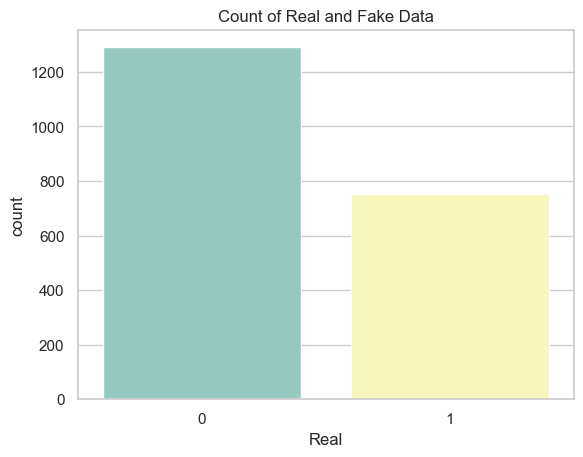

In [16]:
sb.set_theme(style="whitegrid")
cnt_plot = sb.countplot(x="Real", data=news_data, palette='Set3')
cnt_plot.set_title("Count of Real and Fake Data")

Plotting to see Counts of Language data

Text(0.5, 1.0, 'Count of Languages of the news')

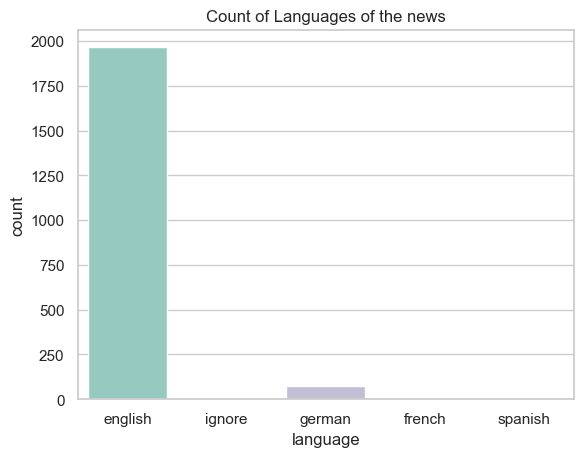

In [17]:
sb.set_theme(style="whitegrid")
cnt_plot = sb.countplot(x="language", data=news_data, palette='Set3')
cnt_plot.set_title("Count of Languages of the news")

Plotting to see Counts of type of news data

Text(0.5, 1.0, 'Count of Type of the news')

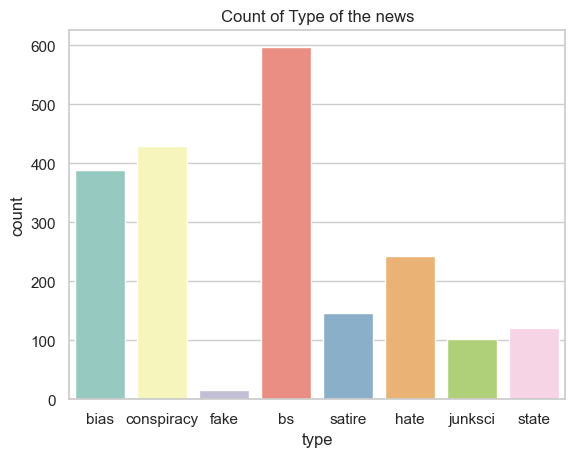

In [18]:
sb.set_theme(style="whitegrid")
cnt_plot = sb.countplot(x="type", data=news_data, palette='Set3')
cnt_plot.set_title("Count of Type of the news")

Plotting to see Counts news data that have images or not

Text(0.5, 1.0, 'Count of news with Images')

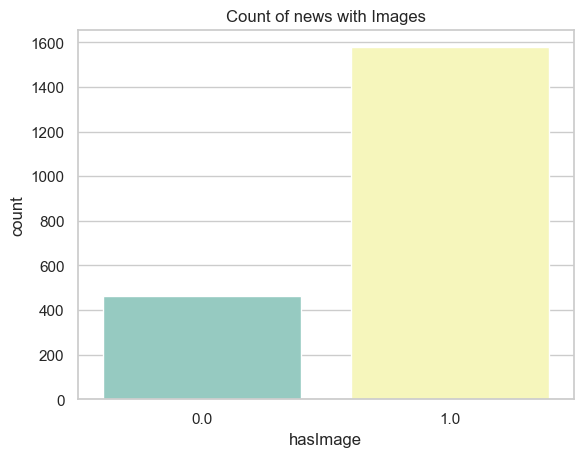

In [19]:
sb.set_theme(style="whitegrid")
cnt_plot = sb.countplot(x="hasImage", data=news_data, palette='Set3')
cnt_plot.set_title("Count of news with Images")

Plotting to see top 10 Authors with most news articles

Text(0.5, 1.0, 'Top 10 Authors with count of news')

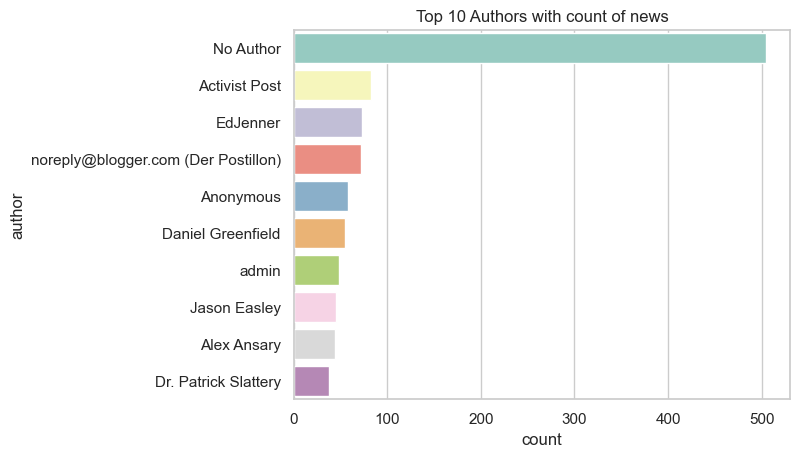

In [20]:
sb.set_theme(style="whitegrid")
cnt_plot = sb.countplot(y="author", data=news_data, palette='Set3', order =news_data.author.value_counts().iloc[:10].index)
cnt_plot.set_title("Top 10 Authors with count of news")

Plotting to see top 10 Authors with most news urls

Text(0.5, 1.0, 'Top 10 Site URLS with count of news')

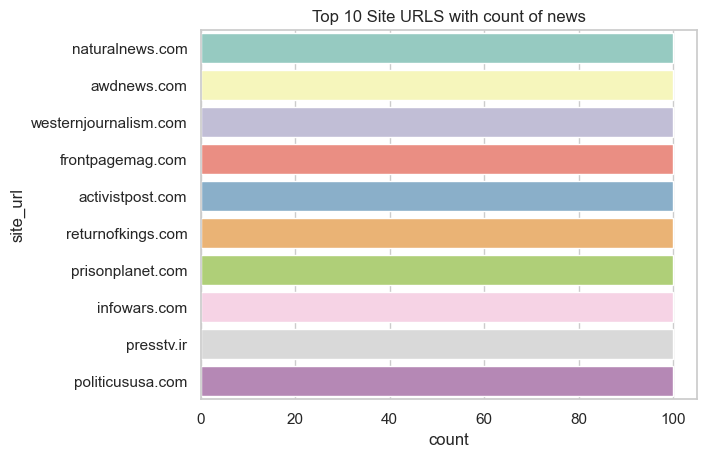

In [21]:
sb.set_theme(style="whitegrid")
cnt_plot = sb.countplot(y="site_url", data=news_data, palette='Set3', order =news_data.site_url.value_counts().iloc[:10].index)
cnt_plot.set_title("Top 10 Site URLS with count of news")

Plotting to see Months of published news

Text(0.5, 1.0, 'Months of published news')

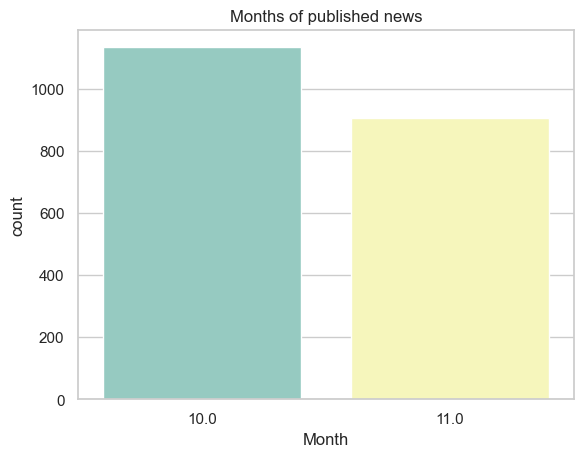

In [22]:
sb.set_theme(style="whitegrid")
cnt_plot = sb.countplot(x="Month", data=news_data, palette='Set3')
cnt_plot.set_title("Months of published news")

Plotting to see Days of pblished news

Text(0.5, 1.0, 'Days of published news')

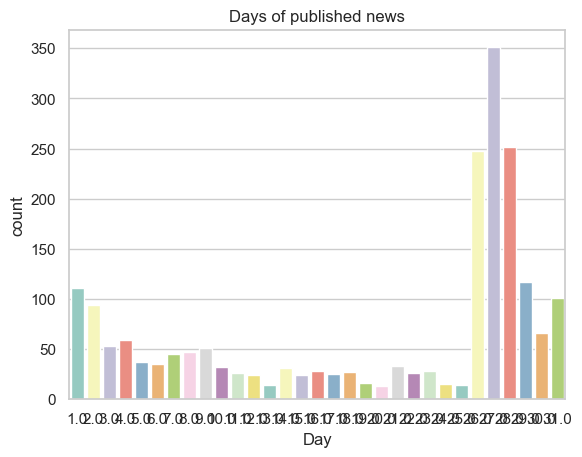

In [23]:
sb.set_theme(style="whitegrid")
cnt_plot = sb.countplot(x="Day", data=news_data, palette='Set3')
sb.set(rc = {'figure.figsize':(10,10)})
cnt_plot.set_title("Days of published news")

Findings from the EDA
1. The dataset is not biased because we have both real and fake data.
2. Because the majority of news data are written in English, we will employ NLP and other approaches designed with the English language in mind.
3. The type of news data is beneficial for classification. Furthermore, bs stands for Bullshit; all items with no type are categorized as bs.
4. The majority of news stories include an image.
5. The most frequently occurring site addresses and author names have been gathered. We can take advantage of the occurrence of similar sites.
6. We have news data just from the month of October and November.
7. Toward the end of each month, we have a lot of articles.


The features that we can use for our model are author, title, text_without_stopwords and site urls. We have to explore these features in detail.

Fake Authors data

In [24]:
news_data.loc[news_data.Real == 0].author.value_counts().head(10)

No Author                              329
Activist Post                           82
noreply@blogger.com (Der Postillon)     72
Anonymous                               58
admin                                   48
Alex Ansary                             44
Henry Wolff                             33
Corbett                                 27
tokyowashi (noreply@blogger.com)        20
Steve Watson                            16
Name: author, dtype: int64

Fake URL sites data

In [25]:
news_data.loc[news_data.Real == 0].site_url.value_counts().head(10)

activistpost.com      100
infowars.com          100
awdnews.com           100
naturalnews.com       100
clickhole.com         100
prisonplanet.com       99
abeldanger.net         82
der-postillon.com      72
ahtribune.com          67
abovetopsecret.com     53
Name: site_url, dtype: int64

Real Authors data

In [26]:
news_data.loc[news_data.Real == 1].author.value_counts().head(10)

No Author               176
EdJenner                 73
Daniel Greenfield        53
Jason Easley             45
Dr. Patrick Slattery     36
-NO AUTHOR-              22
Sarah Jones              16
Roosh Valizadeh          15
Hrafnkell Haraldsson     15
Fed Up                   12
Name: author, dtype: int64

Real URL sites data

In [27]:
news_data.loc[news_data.Real == 1].site_url.value_counts().head(10)

politicususa.com         100
presstv.ir                99
returnofkings.com         99
frontpagemag.com          99
westernjournalism.com     98
dailywire.com             81
wnd.com                   51
davidduke.com             43
100percentfedup.com       33
presstv.com               21
Name: site_url, dtype: int64

In [28]:
real = set(news_data[news_data['Real'] == 1]['site_url'].unique())
fake = set(news_data[news_data['Real'] == 0]['site_url'].unique())
print(f"{real & fake}")

{'frontpagemag.com', 'newstarget.com', 'returnofkings.com', 'presstv.ir', 'washingtonsblog.com', 'fromthetrenchesworldreport.com', 'prisonplanet.com', 'westernjournalism.com', 'davidduke.com'}


Here we can see that the Authors and Sites for real and fake news are clearly different. Meaning the same source is not producing real and fake news. There are some sites that produce both news but mostly they produce 1 type and some news articles can be of the other type. So with the main text, site urls and author names might also help in the prediction. 

### Feature Engineering

In [29]:
#target is our column to be predicted and features are the columns that we will use for modelling
target = news_data.Real
features_data = news_data[['author','site_url','title_without_stopwords','text_without_stopwords']]

In [30]:
features_data

author             site_url  \
0        Barracuda Brigade  100percentfedup.com   
1     reasoning with facts  100percentfedup.com   
2        Barracuda Brigade  100percentfedup.com   
3                   Fed Up  100percentfedup.com   
4                   Fed Up  100percentfedup.com   
...                    ...                  ...   
2041           Matt Barber              wnd.com   
2042         Jane Chastain              wnd.com   
2043         Michael Brown              wnd.com   
2044           Ann Coulter              wnd.com   
2045           Larry Elder              wnd.com   

                                title_without_stopwords  \
0           muslims busted stole millions govt benefits   
1            attorney general loretta lynch plead fifth   
2     breaking weiner cooperating fbi hillary email ...   
3     pin drop speech father daughter kidnapped kill...   
4     fantastic trumps point plan reform healthcare ...   
...                                                 ...   
2041                  trump vs clinton risk vs disaster   
2042                    gingrich slutshames megyn kelly   
2043                    youtube bans clintons black son   
2044             wikileaks bombshells hillary need know   
2045                                     fascinated sex   

                                 text_without_stopwords  
0     print pay back money plus interest entire fami...  
1     attorney general loretta lynch plead fifth bar...  
2     red state fox news sunday reported morning ant...  
3     email kayla mueller prisoner tortured isis cha...  
4     email healthcare reform make america great sin...  
...                                                 ...  
2041  check hillarythemed haunted house anticlinton ...  
2042  good samaritan wearing indian headdress disarm...  
2043  skype sex scam fortune built shame moroccan bo...  
2044  posted eddie skyhigh potency may scare away cr...  
2045  billion even known keeping supposedly deleted ...  

[2043 rows x 4 columns]

In [31]:
#since all the feature columns are text data, we want to use text mining techniques, we put all of them in the same column for ease of processing
features_data['combined_url_text'] = features_data["author"]+" "+features_data["site_url"] + " " + features_data['title_without_stopwords'] + " " + features_data["text_without_stopwords"]
features_data.drop(['author','site_url', 'title_without_stopwords','text_without_stopwords'], axis = 1, inplace = True)
features_data=features_data.combined_url_text

C:\Users\Praveen\AppData\Local\Temp\ipykernel_15128\2712749694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_data['combined_url_text'] = features_data["author"]+" "+features_data["site_url"] + " " + features_data['title_without_stopwords'] + " " + features_data["text_without_stopwords"]
C:\Users\Praveen\AppData\Local\Temp\ipykernel_15128\2712749694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_data.drop(['author','site_url', 'title_without_stopwords','text_without_stopwords'], axis = 1, inplace = True)


In [32]:
features_data

0       Barracuda Brigade 100percentfedup.com muslims ...
1       reasoning with facts 100percentfedup.com attor...
2       Barracuda Brigade 100percentfedup.com breaking...
3       Fed Up 100percentfedup.com pin drop speech fat...
4       Fed Up 100percentfedup.com fantastic trumps po...
                              ...                        
2041    Matt Barber wnd.com trump vs clinton risk vs d...
2042    Jane Chastain wnd.com gingrich slutshames megy...
2043    Michael Brown wnd.com youtube bans clintons bl...
2044    Ann Coulter wnd.com wikileaks bombshells hilla...
2045    Larry Elder wnd.com fascinated sex billion eve...
Name: combined_url_text, Length: 2043, dtype: object

We want to explore the test data.
We want to see which words and topics are commom to the fake and real data.
We want to see words that are completely unique to the fake and real data.

###### TFIDF Vectorizer
Term Frequency: This summarizes how often a given word appears within a document.
Inverse Document Frequency: This downscales words that appear a lot across documents.
TF-IDF are word frequency scores that try to highlight words that are more interesting.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_data = TfidfVectorizer(stop_words='english')
X = vectorizer_data.fit_transform(features_data)

In [34]:
print(X)

  (0, 34638)	0.1001701667714759
  (0, 8691)	0.09183491286729273
  (0, 45502)	0.06871932500524887
  (0, 41061)	0.2274132280826234
  (0, 36611)	0.2274132280826234
  (0, 16131)	0.11609257906734237
  (0, 7946)	0.13942352554745743
  (0, 34441)	0.2274132280826234
  (0, 27502)	0.11550726630322927
  (0, 24280)	0.05864356833412599
  (0, 6365)	0.12021936772859466
  (0, 28856)	0.122714795721645
  (0, 34901)	0.08882593664881767
  (0, 45831)	0.11638977685628904
  (0, 27074)	0.09339962798020439
  (0, 26521)	0.08871190337737253
  (0, 38917)	0.2274132280826234
  (0, 41361)	0.15172683207981677
  (0, 17593)	0.15149854573134636
  (0, 39806)	0.15614777029384516
  (0, 17900)	0.17788085028822
  (0, 5785)	0.1842772960989572
  (0, 46742)	0.06690739643761645
  (0, 2504)	0.20113462382189698
  (0, 10619)	0.17602676701262318
  :	:
  (2041, 27966)	0.01466315980600021
  (2041, 14748)	0.01697756052342493
  (2041, 31591)	0.024300520094900052
  (2041, 4069)	0.023585501335226387
  (2041, 7834)	0.0059874103894305055
  (

In [35]:
#trying to cluster the 2 data centres ie fake and real news
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 100, n_init = 1, verbose = True, random_state=8)
km.fit(X)

Initialization complete
Iteration 0, inertia 3904.511884574175
Iteration 1, inertia 1990.2121191205906
Iteration 2, inertia 1985.1785628155592
Iteration 3, inertia 1983.5404793031034
Iteration 4, inertia 1982.993612817216
Iteration 5, inertia 1982.8290227480286
Iteration 6, inertia 1982.6848519192056
Iteration 7, inertia 1982.6132098310352
Iteration 8, inertia 1982.5849648712265
Iteration 9, inertia 1982.5342085748343
Iteration 10, inertia 1982.4878721685363
Iteration 11, inertia 1982.4578717700556
Iteration 12, inertia 1982.4425474539346
Iteration 13, inertia 1982.4341107285788
Iteration 14, inertia 1982.429093755459
Converged at iteration 14: strict convergence.


KMeans(max_iter=100, n_clusters=2, n_init=1, random_state=8, verbose=True)

In [36]:
import numpy as np
np.unique(km.labels_, return_counts=True)
features_data.reset_index(drop=True, inplace=True)

In [37]:
#Here we are collecting all the fake data into one cluster and all the real data into another.
#We are doing this as a pre step to the coming logic.
text={}
for i,cluster in enumerate(km.labels_):
    oneDocument = features_data[i]
    if cluster not in text.keys():
        text[cluster] = oneDocument
    else:
        text[cluster] += oneDocument

In [38]:
text

{1: 'Barracuda Brigade 100percentfedup.com muslims busted stole millions govt benefits print pay back money plus interest entire family everyone came need deported asap take two years bust go another group stealing government taxpayers group somalis stole four million government benefits months weve reported numerous cases like one muslim refugeesimmigrants commit fraud scamming systemits way control relatedreasoning with facts 100percentfedup.com attorney general loretta lynch plead fifth attorney general loretta lynch plead fifth barracuda brigade print administration blocking congressional probe cash payments iran course needs plead th either cant recall refuses answer plain deflects question straight corruption finest percentfedupcom talk covering ass loretta lynch plead fifth avoid incriminating payments irancorrupt core attorney general loretta lynch declining comply investigation leading members congress obama administrations secret efforts send iran billion cash earlier year pr

In [39]:
#importing NLTK libraries for NLP techiniques
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from string import punctuation
from heapq import nlargest
import nltk 

In [40]:
#here we are finding the keywords that appear in both the clusters and we do not want to include the stop words as those will be the most frequent
_stopwords = set(stopwords.words('english') + list(punctuation))

keywords = {}
counts={}
for cluster in range(2):
    word_sent = word_tokenize(text[cluster].lower())
    word_sent=[word for word in word_sent if word not in _stopwords]
    freq = FreqDist(word_sent)
    keywords[cluster] = nlargest(100, freq, key=freq.get)
    counts[cluster]=freq

In [41]:
keywords

{0: ['clinton',
  'trump',
  'hillary',
  'election',
  'campaign',
  'would',
  'said',
  'us',
  'donald',
  'fbi',
  'one',
  'people',
  'president',
  'clintons',
  'new',
  'obama',
  'state',
  'email',
  'like',
  'also',
  'media',
  'emails',
  'news',
  'even',
  'presidential',
  'trumps',
  'could',
  'investigation',
  'democratic',
  'vote',
  'time',
  'white',
  'political',
  'republican',
  'states',
  'going',
  'voters',
  'comey',
  'american',
  'get',
  'house',
  'many',
  'know',
  'day',
  'first',
  'bill',
  'party',
  'dont',
  'years',
  'way',
  'podesta',
  'america',
  'democrats',
  'republicans',
  'candidate',
  'october',
  'foundation',
  'women',
  'former',
  'see',
  'country',
  'percent',
  'americans',
  'think',
  'last',
  'two',
  'force',
  'back',
  'national',
  'government',
  'department',
  'public',
  'say',
  'right',
  'united',
  'next',
  'may',
  'support',
  'million',
  'director',
  'told',
  'much',
  'take',
  'well',
  '

In [42]:
counts

{0: FreqDist({'clinton': 2861, 'trump': 2802, 'hillary': 1851, 'election': 1162, 'campaign': 944, 'would': 926, 'said': 924, 'us': 890, 'donald': 830, 'fbi': 801, ...}),
 1: FreqDist({'one': 1587, 'us': 1542, 'people': 1522, 'said': 1403, 'would': 1302, 'also': 1175, 'like': 1065, 'time': 959, 'even': 874, 'trump': 841, ...})}

In [43]:
#here we are finding keyword that are uniques to each cluster
set0 = set(keywords[0])
set1 = set(keywords[1])
unique0=set0-set1
unique1 =set1-set0

In [44]:
unique_keys_values={}
unique_keys_values[0]=nlargest(3000, unique0, key=counts[0].get)
unique_keys_values[1]=nlargest(3000, unique1, key=counts[1].get)

In [45]:
#Get all Fake words
counts[0]-counts[1]

FreqDist({'clinton': 2490, 'trump': 1961, 'hillary': 1465, 'election': 792, 'fbi': 724, 'campaign': 721, 'clintons': 624, 'donald': 515, 'emails': 478, 'investigation': 389, ...})

In [46]:
#Get all True words
counts[1]-counts[0]

FreqDist({'one': 787, 'people': 759, 'us': 652, 'also': 623, 'world': 535, 'time': 528, 'police': 504, 'der': 503, 'said': 479, 'like': 462, ...})

In [47]:
unique_keys_values

{0: ['campaign',
  'fbi',
  'clintons',
  'email',
  'emails',
  'presidential',
  'trumps',
  'investigation',
  'democratic',
  'vote',
  'republican',
  'voters',
  'comey',
  'house',
  'bill',
  'party',
  'podesta',
  'republicans',
  'democrats',
  'candidate',
  'foundation',
  'former',
  'percent',
  'americans',
  'force',
  'national',
  'department',
  'next',
  'million',
  'support',
  'director',
  'told',
  'voting',
  'wikileaks',
  'november',
  'information',
  'nominee',
  'black',
  'russia'],
 1: ['police',
  'life',
  'author',
  'der',
  'men',
  'man',
  'good',
  'want',
  'war',
  'food',
  'die',
  'still',
  'work',
  'year',
  'need',
  'around',
  'law',
  'human',
  'health',
  'use',
  'used',
  'part',
  'power',
  'system',
  'im',
  'fact',
  'city',
  'without',
  'de',
  'today',
  'things',
  'water',
  'times',
  'really',
  'might',
  'military',
  'israel',
  'help',
  'must']}

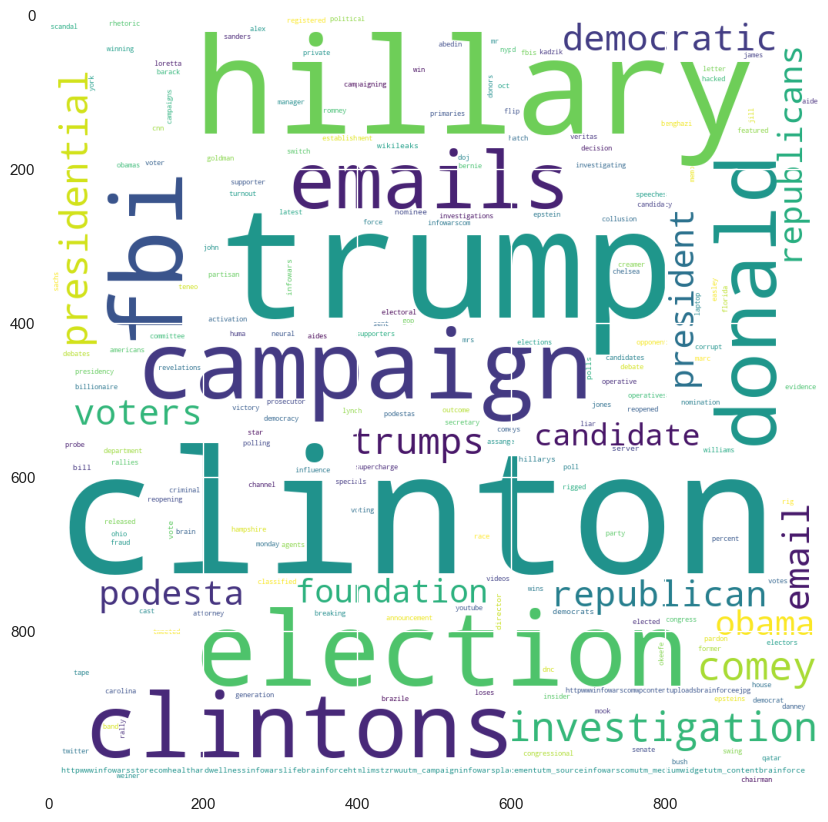

In [48]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1000,height=1000,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(counts[0]-counts[1])
plt.imshow(wc)

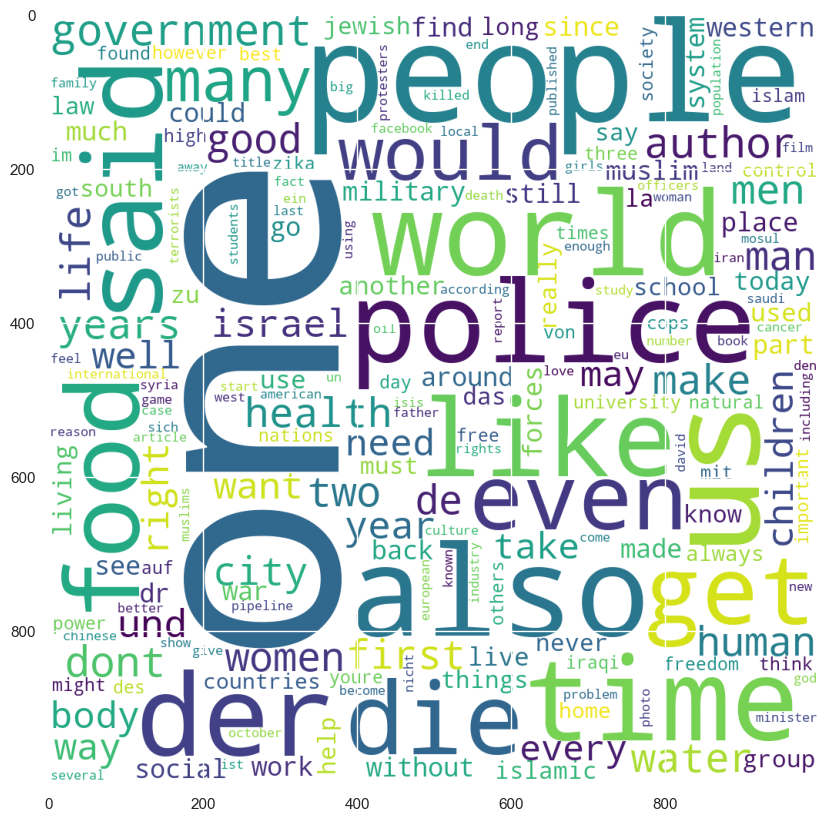

In [49]:
wc = WordCloud(background_color="white",width=1000,height=1000,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(counts[1]-counts[0])
plt.imshow(wc)

These are the words that are unique to each class. This gives us an idea about our news data.

### Modelling and Prediction

In [50]:
#using the Vectorizer before doing the classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features_data,target,test_size=0.20, random_state=8)

vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=vectorizer.get_feature_names())

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
print(tfidf_train.shape)
print(y_train.shape)

(1634, 42235)
(1634,)


In [52]:
#Kneighbors Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNb_values = KNeighborsClassifier(n_neighbors=10)
KNb_values.fit(tfidf_train, y_train)
y_pred = KNb_values.predict(tfidf_test)
KNscore=metrics.accuracy_score(y_test,y_pred)
print("Kneighbors Model accuracy: %0.4f" %KNscore)

Kneighbors Model accuracy: 0.7311


C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [53]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=1000, random_state=8)
RFC.fit(tfidf_train,y_train)
y_pred = RFC.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred)
print("Random Forest Model accuracy:  %0.4f" %RFscore)

Random Forest Model accuracy:  0.9169


In [54]:
#Adaboost Classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Adaboost_value = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5, random_state=8)
Adaboost_value.fit(tfidf_train, y_train)
y_pred = Adaboost_value.predict(tfidf_test)
ABscore = metrics.accuracy_score(y_test,y_pred)
print("Ada boost Classifier accuracy: %0.4f" %ABscore)

Ada boost Classifier accuracy: 0.9658


Among all the classifications, Adaboost is performing the best. We will choose AdaBoost Model

### Result

In [55]:
#creating a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[256   4]
 [ 10 139]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

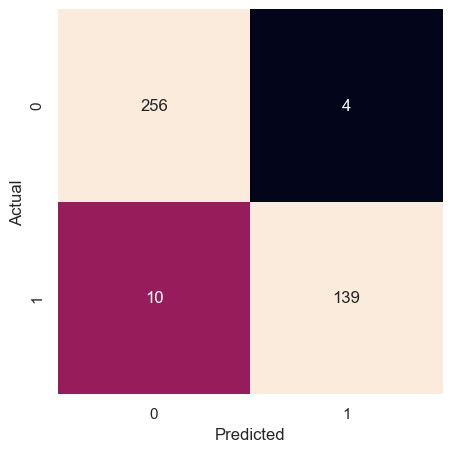

In [56]:
#creating a matrix using seaborn
import seaborn as sns

cm_df_value = pd.DataFrame(conf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
cm_df_value.columns.name = 'Predicted'
cm_df_value.index.name = 'Actual'
cm_df_value
plt.figure(figsize=(5,5))
sns.heatmap(cm_df_value, annot=True, vmax=20, square=True,annot_kws={"size":12} ,cbar=False, fmt='g')

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.965770
Precision: 0.972028
Recall: 0.932886
F1 score: 0.952055


In [58]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       260
           1       0.97      0.93      0.95       149

    accuracy                           0.97       409
   macro avg       0.97      0.96      0.96       409
weighted avg       0.97      0.97      0.97       409



As we can see in the Confusion matrix, we have 263 records correctly predicted Fake and 139 records correctly predicted as Real. 3 Fake news were predicted as Real and 4 Real news were predicted as Fake.

Text(0, 0.5, 'True Positive Rate')

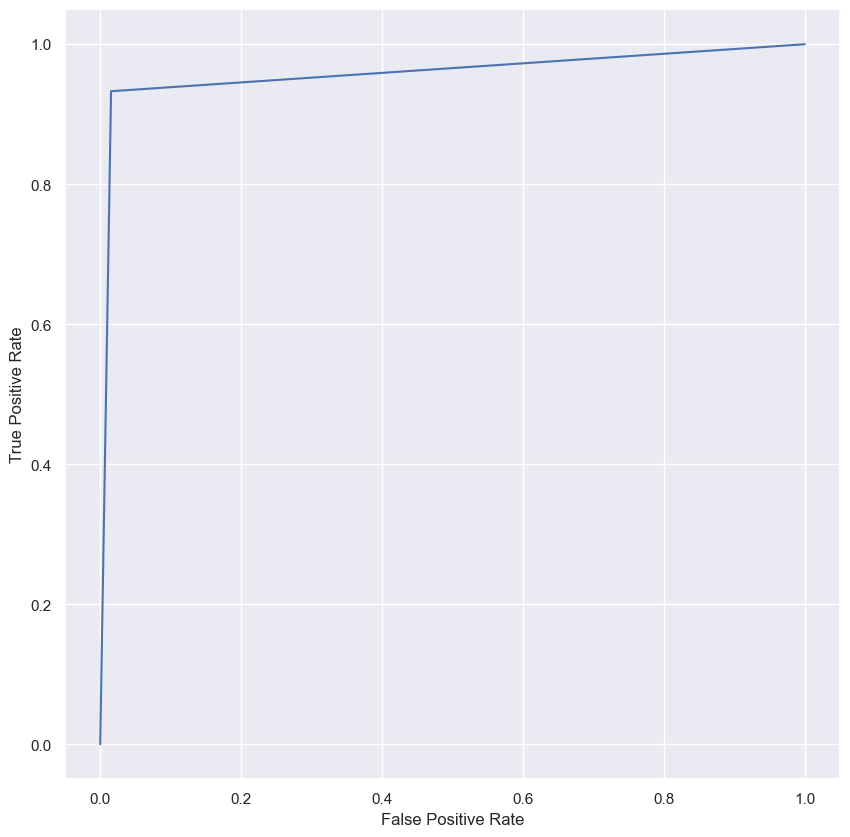

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [60]:
print('AUC: %f' % roc_auc_score(y_test, y_pred))

AUC: 0.958751


### Conclusion

We have successfully build a model to classify news as Fake or Real.
Adaboost Classfier gave us an accuracy upto 98% which is really great.
This Model can be used best for political news as most of our training records contain political news.
The same model can be further extended for all news types with a larger and more diverse dataset.